In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io as sio
import numpy as np

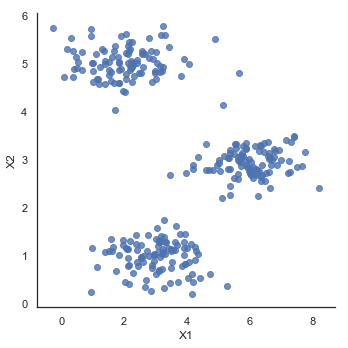

In [2]:
#读入数据，将数据转化为DataFrame
mat = sio.loadmat('ex7data2.mat')
data = pd.DataFrame(mat.get('X'),columns=['X1','X2'])

# 将数据可视化
sns.set(context='notebook',style='white')
sns.lmplot('X1','X2',data=data,fit_reg=False)

In [3]:
#计算两个向量之间的距离
def distEclud(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))

In [79]:
#随机选择K个聚类中心，进行初始化化
def randCent(dataSet,k):
    # n是数据的维数
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j])-minJ)
        centroids[:,j] = minJ + rangeJ*np.random.rand(k,1)
    return centroids

In [103]:
def KMeans(dataSet,k,distMeans=distEclud,createCent=randCent):
    m = np.shape(dataSet)[0]
    clusterAssment = np.zeros((m,2))
    centroids = createCent(dataSet,k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # 遍历所有样本
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            # 对于一个样本，计算他和每一个聚类中心的距离，找到最小的距离
            for j in range(k):
                distJI = distMeans(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i,0] != minIndex:
                clusterChanged=True
            clusterAssment[i,:] = minIndex,minDist**2
        #print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0]==cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust,axis=0)
    return centroids,clusterAssment

In [104]:
myCentroids,clustAssing =KMeans(data.values,3)

In [105]:
data['C'] = clustAssing[:,0]

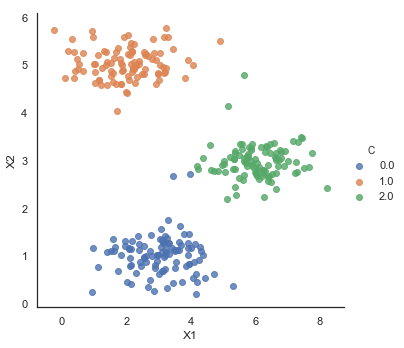

In [106]:
sns.lmplot('X1','X2',hue='C',data=data,fit_reg=False)

In [107]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine)) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

In [112]:
def biKMeans(dataSet,k,distMeans=distEclud,createCent=randCent):
    m = np.shape(dataSet)[0]
    clusterAssment = np.zeros((m,2))
    centroid0 = np.mean(dataSet,axis=0)
    centList = [centroid0]
    for j in range(m):
        clusterAssment[j,1] = distMeans(centroid0,dataSet[j,:])**2
    print(centroid0)
    print('\n')
    while (len(centList)<k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0]==i)[0],:]
            centroidMat,splitClusterAss = KMeans(ptsInCurrCluster,2,distMeans)
            print(centroidMat)
            print(splitClusterAss)
            sseSplit = np.sum(splitClusterAss[:,1])
            sseNotSplit = np.sum(clusterAssment[np.nonzero(clusterAssment[:,0]!=i)[0],1])
            print("sseSplit, and notSplit:",sseSplit,sseNotSplit)
            if(sseSplit+sseNotSplit)<lowestSSE:
                bestCenToSplit = i
                bestNesCents = centroidMat
                bestClustAss = splitClusterAss.copy()
                lowestSSE = sseSplit+sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:,0]==1)[0],0] = len(centList)
        bestClustAss[np.nonzero(bestClustAss[:,0]==0)[0],0] = bestCenToSplit
        print('the bestCentToSplit is ',bestCenToSplit)
        print('the len of bestClusterAss is',len(bestClustAss))
        centList[bestCenToSplit] = bestNesCents[0,:]
        centList.append(bestNesCents[1,:])
        clusterAssment[np.nonzero(clusterAssment[:,0]==bestCenToSplit)[0],:] = bestClustAss
        print(clusterAssment)
        print('---------------------------------------------------------------------------')
    return centList,clusterAssment

In [114]:
dataMat = np.array(loadDataSet('testSet2.txt'))
x,y=biKMeans(dataMat,3)

[-0.15772275  1.22533012]


[[ 1.23710375  0.17480612]
 [-2.94737575  3.3263781 ]]
[[ 0.         11.89751822]
 [ 1.          0.68021383]
 [ 0.         13.39033953]
 [ 0.         11.75269148]
 [ 1.          1.35376464]
 [ 0.          6.09872275]
 [ 0.         16.77855538]
 [ 1.          0.22011627]
 [ 0.          9.90729312]
 [ 0.          1.52374845]
 [ 1.          5.2807004 ]
 [ 0.         10.67860099]
 [ 0.          5.78199459]
 [ 1.          0.16789088]
 [ 0.         20.46319027]
 [ 0.          9.48566105]
 [ 1.          4.93628241]
 [ 0.         12.1340925 ]
 [ 0.         13.56634179]
 [ 1.          0.63934605]
 [ 0.          7.15391786]
 [ 0.         10.62193717]
 [ 1.          0.7506828 ]
 [ 0.         10.94019133]
 [ 0.         24.17676856]
 [ 1.          5.15437527]
 [ 0.          6.22454541]
 [ 0.         18.65270007]
 [ 1.          0.46686031]
 [ 0.         17.8566228 ]
 [ 0.          8.81869764]
 [ 1.          3.54002368]
 [ 0.         14.73630243]
 [ 0.         18.62409444]

In [100]:
x

[matrix([[-0.45965615, -2.7782156 ]]),
 matrix([[2.93386365, 3.12782785]]),
 matrix([[-2.94737575,  3.3263781 ]])]